In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_base = pd.read_csv('data/food-facts/data.featureEngineering.tsv', sep='\t', dtype={'code':str})

In [3]:
df_base.shape

(170239, 13)

In [4]:
df_base.head()

,code,created_datetime,product_name,brands,ingredients_text,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,organic
0,4559,03/09/2017,Peanuts,Torn & Glasser,"Peanuts, wheat flour, sugar, rice flour, tapio...",1941.0,17.86,0.00,60.71,17.86,0.63500,0.250,0
1,16087,03/09/2017,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",2540.0,57.14,5.36,17.86,3.57,1.22428,0.482,1
2,16094,03/09/2017,Organic Polenta,Bob's Red Mill,Organic polenta,1552.0,1.43,0.00,77.14,0.00,0.00000,0.000,1
3,16100,03/09/2017,Breadshop Honey Gone Nuts Granola,Unfi,"Rolled oats, grape concentrate, expeller press...",1933.0,18.27,1.92,63.46,11.54,0.00000,0.000,0
4,16117,03/09/2017,Organic Long Grain White Rice,Lundberg,Organic long grain white rice,1490.0,0.00,0.00,80.00,0.00,0.00000,0.000,1


In [5]:
df_interest = df_base[['code','product_name','brands','ingredients_text','sugars_100g','salt_100g','organic']]

In [6]:
df_interest.head() # 0 non-organic, 1 organic

,code,product_name,brands,ingredients_text,sugars_100g,salt_100g,organic
0,4559,Peanuts,Torn & Glasser,"Peanuts, wheat flour, sugar, rice flour, tapio...",17.86,0.63500,0
1,16087,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",3.57,1.22428,1
2,16094,Organic Polenta,Bob's Red Mill,Organic polenta,0.00,0.00000,1
3,16100,Breadshop Honey Gone Nuts Granola,Unfi,"Rolled oats, grape concentrate, expeller press...",11.54,0.00000,0
4,16117,Organic Long Grain White Rice,Lundberg,Organic long grain white rice,0.00,0.00000,1


In [7]:
df_interest.shape

(170239, 7)

In [27]:
df_interest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170239 entries, 0 to 170238
Data columns (total 7 columns):
code                170239 non-null object
product_name        170239 non-null object
brands              170239 non-null object
ingredients_text    170239 non-null object
sugars_100g         170239 non-null float64
salt_100g           170239 non-null float64
organic             170239 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 10.4+ MB


In [32]:
df_interest = df_interest[(df_interest['sugars_100g'] >= 0.0)]
df_interest = df_interest[(df_interest['salt_100g'] >= 0.0)]

In [34]:
df_interest.sort_values(by="salt_100g").head()

,code,product_name,brands,ingredients_text,sugars_100g,salt_100g,organic
170238,999990026839,"Sugar Free Drink Mix, Peach Tea",Market Pantry,"Citric acid, maltodextrin, instant tea, aspart...",0.00,0.0,0
43534,41331030571,Tropical Juice,Goya,"Filtered water, lemon juice concentrate, lemon...",0.00,0.0,0
132487,746742000136,"Claire Baie, Sparkling Water, Blackberry Raspb...",Wit Group,"Carbonated water, citric acid, natural flavor,...",0.00,0.0,0
43539,41331030625,"Marinade, Bitter Orange","Goya, Goya Foods Inc.","Water, orange juice concentrate, citric acid, ...",13.33,0.0,0
43540,41331030632,"Marinade, Bitter Orange","Goya, Goya Foods Inc.","Water, orange juice concentrate, citric acid, ...",13.33,0.0,0


In [35]:
df_interest = df_interest.drop_duplicates(["code"], keep="first") # inplace = True?

In [36]:
df_interest.shape

(170224, 7)

In [37]:
df_interest = df_interest.set_index(["code"])

In [38]:
df_interest.head()

,product_name,brands,ingredients_text,sugars_100g,salt_100g,organic
code,,,,,,
4559,Peanuts,Torn & Glasser,"Peanuts, wheat flour, sugar, rice flour, tapio...",17.86,0.63500,0
16087,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",3.57,1.22428,1
16094,Organic Polenta,Bob's Red Mill,Organic polenta,0.00,0.00000,1
16100,Breadshop Honey Gone Nuts Granola,Unfi,"Rolled oats, grape concentrate, expeller press...",11.54,0.00000,0
16117,Organic Long Grain White Rice,Lundberg,Organic long grain white rice,0.00,0.00000,1


In [39]:
# categorizing
df_interest["cat_org"] = df_interest["organic"].astype("category")

In [40]:
df_interest["cat_org"].cat.categories = ["Non-organic", "Organic"]

In [41]:
df_interest["cat_org"].head()

code
4559     Non-organic
16087        Organic
16094        Organic
16100    Non-organic
16117        Organic
Name: cat_org, dtype: category
Categories (2, object): [Non-organic, Organic]

In [42]:
df_interest.head()

,product_name,brands,ingredients_text,sugars_100g,salt_100g,organic,cat_org
code,,,,,,,
4559,Peanuts,Torn & Glasser,"Peanuts, wheat flour, sugar, rice flour, tapio...",17.86,0.63500,0,Non-organic
16087,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",3.57,1.22428,1,Organic
16094,Organic Polenta,Bob's Red Mill,Organic polenta,0.00,0.00000,1,Organic
16100,Breadshop Honey Gone Nuts Granola,Unfi,"Rolled oats, grape concentrate, expeller press...",11.54,0.00000,0,Non-organic
16117,Organic Long Grain White Rice,Lundberg,Organic long grain white rice,0.00,0.00000,1,Organic


In [43]:
grp_organic = df_interest.groupby('cat_org')

In [44]:
grp_organic.groups

{'Non-organic': Index(['4559', '16100', '16872', '18012', '18265', '18289', '18340', '18357',
        '18395', '18401',
        ...
        '96083338', '96092613', '9644000330654', '9661975680', '9755635018555',
        '9763556636543', '9787461062105', '9836654056565', '99567453',
        '999990026839'],
       dtype='object', name='code', length=161225),
 'Organic': Index(['16087', '16094', '16117', '16124', '16193', '16513', '16612', '16650',
        '16933', '17497',
        ...
        '8805167000717', '884038852527', '884853150243', '8854843000138',
        '890180001984', '8954660004170', '9338297000122', '9338297000153',
        '9338297000160', '9780803738782'],
       dtype='object', name='code', length=8999)}

In [45]:
df_grp_organic = pd.DataFrame({'count' : grp_organic.size()})

In [46]:
df_grp_organic

,count
cat_org,
Non-organic,161225
Organic,8999


In [47]:
df_grp_organic['portion'] = df_grp_organic['count'] / df_base.shape[0]

In [48]:
df_grp_organic

,count,portion
cat_org,,
Non-organic,161225,0.947051
Organic,8999,0.052861


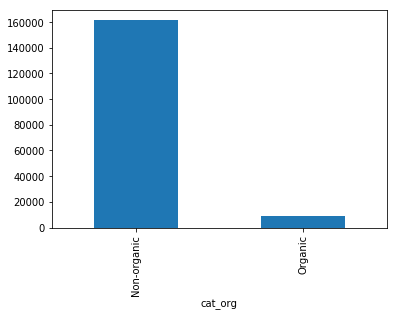

In [49]:
df_grp_organic['count'].plot(kind="bar", fontsize=10)

In [50]:
grp_total_sugar = df_interest['sugars_100g'].groupby(df_interest['cat_org']) 

In [51]:
df_grp_total_sugar = pd.DataFrame({'count' : grp_total_sugar.sum()})

In [52]:
df_grp_total_sugar

,count
cat_org,
Non-organic,2573999.206
Organic,109646.387


In [53]:
df_grp_total_sugar['sugar_portion'] = df_grp_total_sugar['count'] / df_interest['sugars_100g'].sum()

In [54]:
df_grp_total_sugar

,count,sugar_portion
cat_org,,
Non-organic,2573999.206,0.959143
Organic,109646.387,0.040857


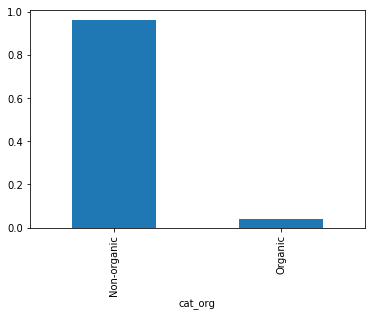

In [55]:
df_grp_total_sugar['sugar_portion'].plot(kind="bar", fontsize=10)

In [56]:
grp_total_salt = df_interest['salt_100g'].groupby(df_interest['cat_org']) 

In [57]:
df_grp_total_salt = pd.DataFrame({'count' : grp_total_salt.sum()})

In [58]:
df_grp_total_salt

,count
cat_org,
Non-organic,362368.528892
Organic,6135.461875


In [59]:
df_grp_total_salt['salt_portion'] = df_grp_total_salt['count'] / df_interest['salt_100g'].sum()

In [60]:
df_grp_total_salt

,count,salt_portion
cat_org,,
Non-organic,362368.528892,0.98335
Organic,6135.461875,0.01665


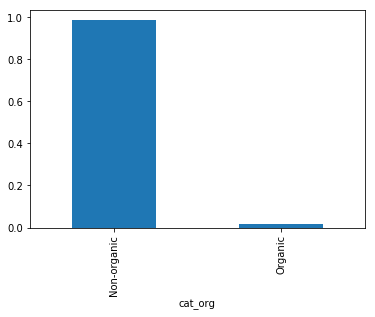

In [61]:
df_grp_total_salt['salt_portion'].plot(kind="bar", fontsize=10)

In [63]:
# cleansing brands

In [62]:
df_interest['brands'] = df_interest['brands'].str.replace(r",.*","")
df_interest['brands'] = df_interest['brands'].str.replace("!|Bros.| Co.| Inc.| Llc","")
df_interest['brands'] = df_interest['brands'].str.replace("-"," ")
df_interest['brands'] = df_interest['brands'].str.strip()

In [63]:
arr_brands = df_interest['brands'].unique()
arr_brands.sort()
df_brands_list = pd.DataFrame(arr_brands, columns=['brand'])
df_brands_list.to_csv('data/food-facts/brands.csv', header = False, index = False)

In [64]:
df_interest.head()

,product_name,brands,ingredients_text,sugars_100g,salt_100g,organic,cat_org
code,,,,,,,
4559,Peanuts,Torn & Glasser,"Peanuts, wheat flour, sugar, rice flour, tapio...",17.86,0.63500,0,Non-organic
16087,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",3.57,1.22428,1,Organic
16094,Organic Polenta,Bob's Red Mill,Organic polenta,0.00,0.00000,1,Organic
16100,Breadshop Honey Gone Nuts Granola,Unfi,"Rolled oats, grape concentrate, expeller press...",11.54,0.00000,0,Non-organic
16117,Organic Long Grain White Rice,Lundberg,Organic long grain white rice,0.00,0.00000,1,Organic


In [77]:
mask_brand = df_interest['brands'].value_counts()

In [108]:
mask_index = mask_brand[0:50].index

In [109]:
mask_index

Index(['Meijer', 'Kroger', 'Great Value', 'Ahold', 'Spartan', 'Roundy's',
       'Weis', 'Food Lion', 'Shoprite', 'Harris Teeter', 'Giant Eagle',
       'Hy Vee', 'Food Club', 'Hannaford', 'Target Stores',
       'Whole Foods Market', '365 Everyday Value', 'Wegmans',
       'Essential Everyday', 'Market Pantry', 'Goya', 'Schnucks',
       'Weis Quality', 'Giant', 'Trader Joe's', 'Tops', 'Fresh & Easy',
       'Big Y', 'Winn Dixie', 'Clover Valley', 'Brookshire's', 'Key Food',
       'Wal Mart Stores', 'Mccormick', 'Raley's', 'Nice', 'Western Family',
       'Valu Time', 'Hormel', 'Signature Kitchens', 'Southern Home',
       'Gold Emblem', 'Lowes Foods', 'Shurfine', 'Wilton', 'Private Selection',
       'Dannon', 'Wild Harvest', 'Archer Farms', 'Safeway'],
      dtype='object')

In [226]:
grp_brand_sugar = df_interest['sugars_100g'].groupby([df_interest['brands'],df_interest['organic']])

In [227]:
df_grp_brand_sugar_cnt = pd.DataFrame({'sugar_sum' : grp_brand_sugar.count()})

In [228]:
df_grp_brand_sugar_sum = pd.DataFrame({'sugar_sum' : grp_brand_sugar.sum()})

In [229]:
df_unstack_sugar_cnt = df_grp_brand_sugar_cnt.unstack()

In [230]:
df_unstack_sugar_cnt.head()

sugar_sum    
organic                     0   1
brands                           
"Dirty"                   1.0 NaN
"Grana" Sp. Z O. O.       1.0 NaN
0  72935 01160  4         1.0 NaN
1 2                       1.0 NaN
1 2 3 Gluten Free         3.0 NaN

In [231]:
df_brand_sugar = df_unstack_sugar_cnt.loc[mask_index]

In [232]:
df_brand_sugar.head()

sugar_sum       
organic             0      1
Meijer         2646.0  151.0
Kroger         1964.0    NaN
Great Value    1422.0   24.0
Ahold          1285.0   92.0
Spartan        1339.0    NaN

In [233]:
df_brand_sugar = df_brand_sugar['sugar_sum']

In [246]:
df_brand_sugar.columns =  ['Non-Organic','Organic']

In [248]:
df_brand_sugar.head()

,Non-Organic,Organic
Meijer,2646.0,151.0
Kroger,1964.0,NaN
Great Value,1422.0,24.0
Ahold,1285.0,92.0
Spartan,1339.0,NaN


In [250]:
df_brand_sugar['Organic'] = df_brand_sugar['Organic'].fillna(0.0)

In [251]:
df_brand_sugar.head()

,Non-Organic,Organic
Meijer,2646.0,151.0
Kroger,1964.0,0.0
Great Value,1422.0,24.0
Ahold,1285.0,92.0
Spartan,1339.0,0.0


In [252]:
df_brand_sugar['sugar_non_cnt'] = \
    df_brand_sugar['Non-Organic'] / ( df_brand_sugar['Non-Organic'] + df_brand_sugar['Organic'] )  

In [253]:
df_brand_sugar['sugar_org_cnt'] = \
    df_brand_sugar['Organic'] / ( df_brand_sugar['Non-Organic'] + df_brand_sugar['Organic'] )  

In [254]:
df_brand_sugar.head()

,Non-Organic,Organic,sugar_non_cnt,sugar_org_cnt
Meijer,2646.0,151.0,0.946014,0.053986
Kroger,1964.0,0.0,1.000000,0.000000
Great Value,1422.0,24.0,0.983402,0.016598
Ahold,1285.0,92.0,0.933188,0.066812
Spartan,1339.0,0.0,1.000000,0.000000


<IPython.core.display.Javascript object>


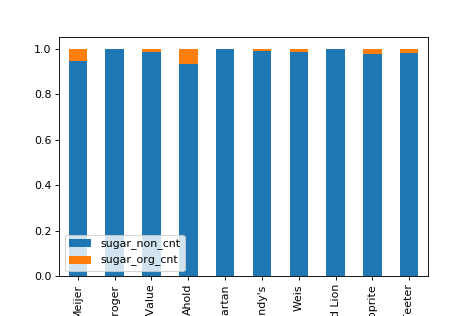

In [281]:
%matplotlib nbagg 
gp_bar_sugar_cnt = df_brand_sugar.loc[mask_index[0:10],['sugar_non_cnt','sugar_org_cnt']].plot(kind="bar",stacked=True)
#gp_harh = df_brand_sugar.loc[1,['sugar_non_cnt','sugar_org_cnt' ]].plot(kind="bar",stacked=True, fontsize=10)

In [263]:
df_unstack_sugar_sum = df_grp_brand_sugar_sum.unstack()

In [286]:
df_unstack_sugar_sum.head()

sugar_sum    
organic                     0   1
brands                           
"Dirty"                  3.53 NaN
"Grana" Sp. Z O. O.     50.00 NaN
0  72935 01160  4        0.00 NaN
1 2                     21.43 NaN
1 2 3 Gluten Free      108.11 NaN

In [287]:
df_brand_sugar_sum = df_unstack_sugar_sum.loc[mask_index]

In [288]:
df_brand_sugar_sum.head()

sugar_sum         
organic             0        1
Meijer       36664.73  1498.87
Kroger       22871.20      NaN
Great Value  16569.10   260.38
Ahold        18134.62   765.59
Spartan      18132.43      NaN

In [289]:
df_brand_sugar_sum = df_brand_sugar_sum['sugar_sum']

In [290]:
df_brand_sugar_sum.head()

organic,0,1
Meijer,36664.73,1498.87
Kroger,22871.20,NaN
Great Value,16569.10,260.38
Ahold,18134.62,765.59
Spartan,18132.43,NaN


In [291]:
df_brand_sugar_sum.columns =  ['Non-Organic_sum','Organic_sum']

In [293]:
df_brand_sugar_sum['Organic_sum'] = df_brand_sugar_sum['Organic_sum'].fillna(0.0)

In [295]:
df_brand_sugar_sum['sugar_non_sum'] = \
    df_brand_sugar_sum['Non-Organic_sum'] / ( df_brand_sugar_sum['Non-Organic_sum'] + df_brand_sugar_sum['Organic_sum'] )  

In [296]:
df_brand_sugar_sum['sugar_org_sum'] = \
    df_brand_sugar_sum['Organic_sum'] / ( df_brand_sugar_sum['Non-Organic_sum'] + df_brand_sugar_sum['Organic_sum'] )  

In [297]:
df_brand_sugar_sum.head()

,Non-Organic_sum,Organic_sum,sugar_non_sum,sugar_org_sum
Meijer,36664.73,1498.87,0.960725,0.039275
Kroger,22871.20,0.00,1.000000,0.000000
Great Value,16569.10,260.38,0.984528,0.015472
Ahold,18134.62,765.59,0.959493,0.040507
Spartan,18132.43,0.00,1.000000,0.000000


<IPython.core.display.Javascript object>


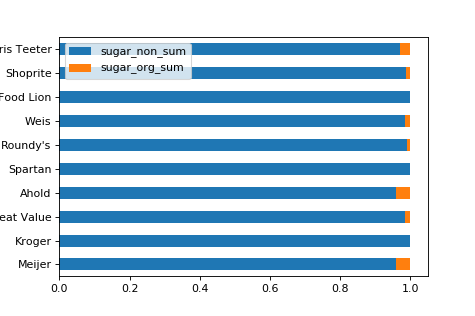

In [299]:
gp_bar_sugar_sum = df_brand_sugar_sum.loc[mask_index[0:10],['sugar_non_sum','sugar_org_sum']].plot(kind="barh",stacked=True)

In [301]:
pd.merge(df_brand_sugar, df_brand_sugar_sum, left_index=True, right_index=True)

,Non-Organic,Organic,sugar_non_cnt,sugar_org_cnt,Non-Organic_sum,Organic_sum,sugar_non_sum,sugar_org_sum
Meijer,2646.0,151.0,0.946014,0.053986,36664.730,1498.870,0.960725,0.039275
Kroger,1964.0,0.0,1.000000,0.000000,22871.200,0.000,1.000000,0.000000
Great Value,1422.0,24.0,0.983402,0.016598,16569.100,260.380,0.984528,0.015472
Ahold,1285.0,92.0,0.933188,0.066812,18134.620,765.590,0.959493,0.040507
Spartan,1339.0,0.0,1.000000,0.000000,18132.430,0.000,1.000000,0.000000
Roundy's,1298.0,16.0,0.987823,0.012177,17853.020,153.380,0.991482,0.008518
Weis,1200.0,19.0,0.984413,0.015587,16685.390,271.520,0.983988,0.016012
Food Lion,1217.0,0.0,1.000000,0.000000,14931.520,0.000,1.000000,0.000000
Shoprite,1138.0,28.0,0.975986,0.024014,12914.930,139.490,0.989315,0.010685
Harris Teeter,1102.0,24.0,0.978686,0.021314,10548.480,303.600,0.972024,0.027976


In [38]:
seri_brands_cnt = df_rm_pure_salt_sugar['brands'].value_counts()

In [39]:
seri_brands_cnt.drop('None', inplace=True)

In [46]:
seri_brands_cnt.iloc[0:30].index

Index(['Meijer', 'Kroger', 'Ahold', 'Spartan', 'Roundy's', 'Great Value',
       'Weis', 'Target Stores', 'Shoprite', 'Food Club', 'Harris Teeter',
       'Food Lion', 'Essential Everyday', 'Goya', 'Schnucks', 'Weis Quality',
       'Hannaford,  Hannaford Bros. Co.', 'Giant', 'Giant Eagle', 'Wegmans',
       'Meijer,  Meijer  Inc.',
       '365 Everyday Value,  Whole Foods Market  Inc.', 'Trader Joe's',
       'Hy-Vee', 'Food Lion,  Food Town Stores Inc.', 'Fresh & Easy',
       'Raley's', 'Market Pantry', 'Wal-Mart Stores  Inc.', 'Key Food'],
      dtype='object')

In [54]:
df_total_sugar_by_brands = df_rm_pure_salt_sugar.pivot_table("sugars_100g", index="brands", columns="organic", aggfunc=sum)

In [64]:
df_total_sugar_by_brands.iloc[0:5]

organic,False,True
brands,,
!Ajua!,35.83,NaN
"""Dirty""",3.53,NaN
"""Grana"" Sp. Z O. O.",50.00,NaN
0 72935 01160 4,0.00,NaN
1 2,21.43,NaN


In [65]:
df_total_sugar_by_brands.shape

(28285, 2)

In [67]:
seri_brands_cnt = df_total_sugar_by_brands['brands'].value_counts()

KeyError: 'brands'

In [24]:
# remove duplicate
df_rm_dup = df_base[df_base.code.duplicated() == False]

In [25]:
df_rm_dup.shape

(172944, 33)

In [39]:
df_rm_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172944 entries, 0 to 173062
Data columns (total 33 columns):
Unnamed: 0                     172944 non-null int64
code                           172944 non-null object
url                            172944 non-null object
created_datetime               172944 non-null object
product_name                   172944 non-null object
brands                         172944 non-null object
countries                      172944 non-null object
ingredients_text               172944 non-null object
allergens                      172944 non-null object
serving_size                   172944 non-null object
additives                      172944 non-null object
ingredients_from_palm_oil_n    172944 non-null float64
main_category                  172944 non-null object
energy_100g                    172944 non-null float64
fat_100g                       172944 non-null float64
saturated-fat_100g             172944 non-null float64
carbohydrates_100g    

In [33]:
# NaN makes an error
df_rm_dup[['product_name','brands','ingredients_text','allergens','main_category']] = \
df_rm_dup[['product_name','brands','ingredients_text','allergens','main_category']].fillna("None").values

C:\Users\TaeWoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\TaeWoo\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [36]:
# NaN makes an error
df_rm_dup[['serving_size','ingredients_from_palm_oil_n']] = \
df_rm_dup[['serving_size','ingredients_from_palm_oil_n']].fillna(0).values

C:\Users\TaeWoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\TaeWoo\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [37]:
df_rm_dup.head()

,Unnamed: 0,code,url,created_datetime,product_name,brands,countries,ingredients_text,allergens,serving_size,...,iron_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g
0,1,4530,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),None,us,"Bananas, vegetable oil (coconut oil, corn oil ...",None,28 g (1 ONZ),...,0.00129,0.0,0.0,0.0,0.0214,0.0,0.0,0.0,0.0,0.0
1,2,4559,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,us,"Peanuts, wheat flour, sugar, rice flour, tapio...",None,28 g (0.25 cup),...,0.00129,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
2,3,16087,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,us,"Organic hazelnuts, organic cashews, organic wa...",None,28 g (0.25 cup),...,0.00514,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
3,4,16094,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,us,Organic polenta,None,35 g (0.25 cup),...,0.00000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
4,5,16100,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,us,"Rolled oats, grape concentrate, expeller press...",None,52 g (0.5 cup),...,0.00346,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0


In [38]:
df_rm_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172944 entries, 0 to 173062
Data columns (total 33 columns):
Unnamed: 0                     172944 non-null int64
code                           172944 non-null object
url                            172944 non-null object
created_datetime               172944 non-null object
product_name                   172944 non-null object
brands                         172944 non-null object
countries                      172944 non-null object
ingredients_text               172944 non-null object
allergens                      172944 non-null object
serving_size                   172944 non-null object
additives                      172944 non-null object
ingredients_from_palm_oil_n    172944 non-null float64
main_category                  172944 non-null object
energy_100g                    172944 non-null float64
fat_100g                       172944 non-null float64
saturated-fat_100g             172944 non-null float64
carbohydrates_100g    

In [42]:
df_rm_dup.product_name.str.contains(r"\b(?:organic|Organic)\b", case=False)

0         False
1         False
2          True
3          True
4         False
5          True
6          True
7          True
8          True
9          True
10         True
11        False
12         True
13         True
14        False
15         True
16         True
17         True
18         True
19        False
20        False
21         True
22        False
23        False
24        False
25         True
26        False
27        False
28        False
29         True
          ...  
173032    False
173033    False
173034    False
173035    False
173036    False
173037    False
173038    False
173039    False
173040    False
173041    False
173042    False
173043    False
173044    False
173045    False
173046    False
173047    False
173048    False
173049    False
173050    False
173051    False
173052    False
173053    False
173054    False
173055    False
173056    False
173057     True
173058    False
173060    False
173061    False
173062    False
Name: product_name, Leng

In [43]:
# df_rm_dup.product_name.str.contains(r"\b(?:organic|Organic)\b", case=False)
df_rm_dup['organic'] = df_rm_dup.product_name.str.contains(r"\b(?:organic|Organic)\b", case=False)

C:\Users\TaeWoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
df_rm_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172944 entries, 0 to 173062
Data columns (total 34 columns):
Unnamed: 0                     172944 non-null int64
code                           172944 non-null object
url                            172944 non-null object
created_datetime               172944 non-null object
product_name                   172944 non-null object
brands                         172944 non-null object
countries                      172944 non-null object
ingredients_text               172944 non-null object
allergens                      172944 non-null object
serving_size                   172944 non-null object
additives                      172944 non-null object
ingredients_from_palm_oil_n    172944 non-null float64
main_category                  172944 non-null object
energy_100g                    172944 non-null float64
fat_100g                       172944 non-null float64
saturated-fat_100g             172944 non-null float64
carbohydrates_100g    

In [46]:
df_rm_dup.head()

,Unnamed: 0,code,url,created_datetime,product_name,brands,countries,ingredients_text,allergens,serving_size,...,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,organic
0,1,4530,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),None,us,"Bananas, vegetable oil (coconut oil, corn oil ...",None,28 g (1 ONZ),...,0.0,0.0,0.0,0.0214,0.0,0.0,0.0,0.0,0.0,False
1,2,4559,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,us,"Peanuts, wheat flour, sugar, rice flour, tapio...",None,28 g (0.25 cup),...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,False
2,3,16087,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,us,"Organic hazelnuts, organic cashews, organic wa...",None,28 g (0.25 cup),...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,True
3,4,16094,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,us,Organic polenta,None,35 g (0.25 cup),...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,True
4,5,16100,http://world-en.openfoodfacts.org/product/0000...,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,us,"Rolled oats, grape concentrate, expeller press...",None,52 g (0.5 cup),...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,False


In [50]:
df_rm_dup.serving_size.unique

<bound method Series.unique of 0             28 g (1 ONZ)
1          28 g (0.25 cup)
2          28 g (0.25 cup)
3          35 g (0.25 cup)
4           52 g (0.5 cup)
5          45 g (0.25 cup)
6           64 g (0.5 cup)
7              40 g (40 g)
8            14 g (1 Tbsp)
9          48 g (0.25 cup)
10          57 g (0.5 cup)
11         30 g (0.25 cup)
12           21 g (2 Tbsp)
13         33 g (0.25 cup)
14          55 g (0.5 cup)
15         28 g (0.25 cup)
16         30 g (0.25 cup)
17         45 g (0.25 cup)
18         42 g (0.25 cup)
19         40 g (0.25 cup)
20         30 g (0.25 cup)
21          55 g (0.5 cup)
22         30 g (0.25 cup)
23           45 g (45 GRM)
24        1.4 g (0.25 tsp)
25          54 g (0.5 cup)
26             30 g (30 g)
27             30 g (30 g)
28             30 g (30 g)
29         30 g (0.25 cup)
                ...       
173032         56 g (56 g)
173033       70 g (2.5 oz)
173034      130 g (4.6 oz)
173035         85 g (3 oz)
173036         85 g (3 o